# Installing the Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

import numpy as np

import os

In [2]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:31<00:00, 17.5MB/s]
100% 2.70G/2.70G [00:31<00:00, 90.7MB/s]


In [3]:
!unzip /content/new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [4]:
import os

# Path to the directory
main_directory = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

# List all folders inside the main directory
folders = [f.name for f in os.scandir(main_directory) if f.is_dir()]

# Print each folder name
print(f"There are {len(folders)} types of diseases.")
for folder in folders:
    print(folder)

There are 38 types of diseases.
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Apple___healthy
Cherry_(including_sour)___healthy
Peach___Bacterial_spot
Tomato___Bacterial_spot
Potato___Early_blight
Tomato___healthy
Peach___healthy
Grape___Esca_(Black_Measles)
Tomato___Tomato_mosaic_virus
Raspberry___healthy
Soybean___healthy
Potato___healthy
Strawberry___Leaf_scorch
Tomato___Late_blight
Cherry_(including_sour)___Powdery_mildew
Corn_(maize)___Northern_Leaf_Blight
Tomato___Target_Spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Leaf_Mold
Strawberry___healthy
Corn_(maize)___Common_rust_
Tomato___Septoria_leaf_spot
Apple___Cedar_apple_rust
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Apple___Apple_scab
Tomato___Early_blight
Blueberry___healthy
Grape___Black_rot
Grape___healthy
Apple___Black_rot
Orange___Haunglongbing_(Citrus_greening)
Pepper,_bell___Bacterial_spot
Potato___Late_blight
Squash___Powdery_mildew
Corn_(maize)___healthy
Pepper,

## So we have categories
- Potato
- Tomato
- Grape
- Corn
- Apple
- Cherry
- Peach
- Raspberry
- Soybean
- Strawberry
- Blueberry
- Orange
- Sqaush

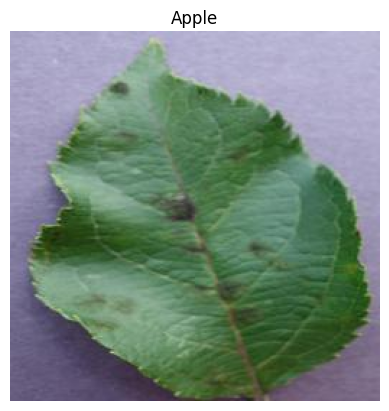

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt


img = Image.open("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG")

    # Display the image
plt.imshow(img)
plt.title("Apple")
plt.axis('off')
plt.show()

# Lets get set with the essentials of the model

In [6]:
image_size = 224 # Input size of the Image
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

batch_size = 32
epochs = 50

In [7]:
base_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"valid")

In [8]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                             shear_range = 0.2,
                                                             zoom_range = 0.2,
                                                             width_shift_range = 0.2,
                                                             height_shift_range = 0.2,
                                                             fill_mode="nearest")

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

In [9]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (image_size, image_size),
                                               batch_size = batch_size,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (image_size, image_size),
                                             batch_size = batch_size,
                                             class_mode = "categorical")

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [10]:
categories = list(train_data.class_indices.keys())
print(train_data.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [11]:
import json
with open('class_indices.json','w') as f:
  json.dump(train_data.class_indices, f)

from IPython.display import FileLink
FileLink(r'class_indices.json')

/content/class_indices.json

# Loading the MobileNet Model

In [12]:
base_model = tf.keras.applications.MobileNet(weights = "imagenet",
                                             include_top = False,
                                             input_shape = input_shape)

base_model.trainable = False

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
inputs = keras.Input(shape = input_shape)

x = base_model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(categories),
                          activation="softmax")(x)

model = keras.Model(inputs = inputs,
                    outputs = x,
                    name="LeafDisease_MobileNet")

In [14]:
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=[keras.metrics.CategoricalAccuracy(),
                       'accuracy'])

In [15]:
model.summary()

Model: "LeafDisease_MobileNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,267,814 (12.47 MB)

 Trainable params: 38,950 (152.15 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

# Let's get done with the training of the model

In [16]:
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=epochs,
                    steps_per_epoch=150,
                    validation_steps=100)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:567: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 94s 541ms/step - accuracy: 0.2749 - categorical_accuracy: 0.2749 - loss: 2.8821 - val_accuracy: 0.8047 - val_categorical_accuracy: 0.8047 - val_loss: 0.7962
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 74s 497ms/step - accuracy: 0.7798 - categorical_accuracy: 0.7798 - loss: 0.8289 - val_accuracy: 0.8544 - val_categorical_accuracy: 0.8544 - val_loss: 0.5145
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 433ms/step - accuracy: 0.8348 - categorical_accuracy: 0.8348 - loss: 0.5811 - val_accuracy: 0.8716 - val_categorical_accuracy: 0.8716 - val_loss: 0.4356
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 435ms/step - accuracy: 0.8540 - categorical_accuracy: 0.8540 - loss: 0.4867 - val_accuracy: 0.9000 - val_categorical_accuracy: 0.9000 - val_loss: 0.3406
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 69s 464ms/step - accuracy: 0.8860 - categorical_accuracy: 0.8860 - loss: 0.3973 - val_accuracy: 0.8975 - val_categorical_accuracy: 0.8975 - val_loss: 0.3347
Epoch 6/50
150/150 ━━━━━━━

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 64s 426ms/step - accuracy: 0.8889 - categorical_accuracy: 0.8889 - loss: 0.3536 - val_accuracy: 0.9222 - val_categorical_accuracy: 0.9222 - val_loss: 0.2458
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 66s 439ms/step - accuracy: 0.8956 - categorical_accuracy: 0.8956 - loss: 0.3365 - val_accuracy: 0.9175 - val_categorical_accuracy: 0.9175 - val_loss: 0.2648
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 68s 457ms/step - accuracy: 0.9075 - categorical_accuracy: 0.9075 - loss: 0.2972 - val_accuracy: 0.9228 - val_categorical_accuracy: 0.9228 - val_loss: 0.2418
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 63s 425ms/step - accuracy: 0.9012 - categorical_accuracy: 0.9012 - loss: 0.2954 - val_accuracy: 0.9225 - val_categorical_accuracy: 0.9225 - val_loss: 0.2334
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 64s 432ms/step - accuracy: 0.9180 - categorical_accuracy: 0.9180 - loss: 0.2617 - val_accuracy: 0.9366 - val_categorical_accuracy: 0.9366 - val_loss: 0.2015
Epoch 12/50
150/150 ━━━━

In [17]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

In [18]:
save_directory = '/content/drive/MyDrive'
print(training_accuracy)
print(validation_accuracy)
accuracy=max(validation_accuracy)
print(accuracy)

[0.4814583361148834, 0.7883333563804626, 0.8464583158493042, 0.8631250262260437, 0.8829166889190674, 0.89041668176651, 0.8899999856948853, 0.8970833420753479, 0.9069088101387024, 0.9037500023841858, 0.9125000238418579, 0.9175000190734863, 0.9191666841506958, 0.9229166507720947, 0.9313788414001465, 0.92208331823349, 0.9302083253860474, 0.9177083373069763, 0.925000011920929, 0.924791693687439, 0.9291666746139526, 0.9293749928474426, 0.9297916889190674, 0.932581901550293, 0.9291666746139526, 0.9306250214576721, 0.9335416555404663, 0.934166669845581, 0.9379166960716248, 0.9320231676101685, 0.9339583516120911, 0.9337499737739563, 0.9308333396911621, 0.9405134916305542, 0.9422916769981384, 0.9335416555404663, 0.9389583468437195, 0.940625011920929, 0.9356250166893005, 0.9354166388511658, 0.9412500262260437, 0.934583306312561, 0.9399999976158142, 0.9264583587646484, 0.9310566782951355, 0.9387500286102295, 0.9389583468437195, 0.9391666650772095, 0.9411396384239197, 0.9322916865348816]
[0.804687

In [19]:
# Save the model
model.save(os.path.join(save_directory, f'mobile_net_50_{accuracy}.h5'))
print(f"Model saved as 'mobile_net.h5' in {save_directory} directory.")

Model saved as 'mobile_net.h5' in /content/drive/MyDrive directory.


# Lets Test the model Out

In [20]:
from google.colab import files
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from IPython.display import FileLink
from PIL import Image
import io

def predict_image(image_path):
  """
  Predicts the disease of a plant image.

  Args:
    image_path: Path to the image file.

  Returns:
    A tuple containing the predicted disease and a list of suggestions.
  """
  # Load the image
  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = np.array(image)
  image = image / 255.0
  image = np.expand_dims(image, axis=0)

  # Load the model
  model = tf.keras.models.load_model('/content/drive/MyDrive/mobile_net_50_9612.h5')

  # Make the prediction
  prediction = model.predict(image)
  predicted_class = np.argmax(prediction)

  # Load the class indices
  with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

  # Get the predicted disease
  for key, value in class_indices.items():
    if value == predicted_class:
      predicted_disease = key
      break

  # Display the image
  plt.imshow(image[0])
  plt.title(f"Predicted Disease: {predicted_disease}")
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


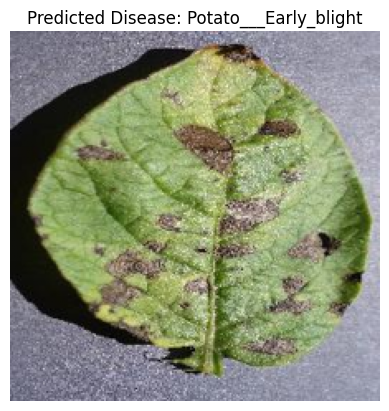

In [21]:
path ="/content/Potato Early Blight.JPG"
predict_image(path)